In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
linearX_np = np.loadtxt("linearX.csv")
linearY_np = np.loadtxt("linearY.csv")

# Confirm successful loading by displaying the first few values
linearX_np[:5], linearY_np[:5]

(array([9.1, 8. , 9.1, 8.4, 6.9]),
 array([0.99523, 0.99007, 0.99769, 0.99386, 0.99508]))

In [21]:
# Normalize the dataset
linearX_np = (linearX_np - np.mean(linearX_np)) / np.std(linearX_np)
linearY_np = (linearY_np - np.mean(linearY_np)) / np.std(linearY_np)

# Display normalized data to confirm
print("First 5 normalized X values:", linearX_np[:5])
print("First 5 normalized Y values:", linearY_np[:5])


First 5 normalized X values: [ 0.60239429 -0.03598116  0.60239429  0.19615537 -0.67435661]
First 5 normalized Y values: [-0.67945662 -3.20157458  0.52294845 -1.34908871 -0.752774  ]


In [22]:
# Initialize parameters
theta_0 = 0  # Intercept
theta_1 = 0  # Slope
learning_rate = 0.1
num_iterations = 100

# Compute cost function
def compute_cost(theta_0, theta_1, X, Y):
    m = len(Y)
    predictions = theta_0 + theta_1 * X
    cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
    return cost

In [23]:
# Perform Batch Gradient Descent
m = len(linearX_np)
cost_history = []

for i in range(num_iterations):
    predictions = theta_0 + theta_1 * linearX_np
    error = predictions - linearY_np

    # Compute gradients
    gradient_theta_0 = (1 / m) * np.sum(error)
    gradient_theta_1 = (1 / m) * np.sum(error * linearX_np)

    # Update parameters
    theta_0 -= learning_rate * gradient_theta_0
    theta_1 -= learning_rate * gradient_theta_1

    # Store cost
    cost = compute_cost(theta_0, theta_1, linearX_np, linearY_np)
    cost_history.append(cost)

    # Print progress every 10 iterations
    if i % 10 == 0:
        print(f"Iteration {i}: Cost = {cost}")

# Final parameters
print("Final values: theta_0 =", theta_0, ", theta_1 =", theta_1)

Iteration 0: Cost = 0.4592346067458747
Iteration 10: Cost = 0.3065740213428849
Iteration 20: Cost = 0.28801405808175157
Iteration 30: Cost = 0.2857575998391391
Iteration 40: Cost = 0.285483267194779
Iteration 50: Cost = 0.2854499147496327
Iteration 60: Cost = 0.2854458598709294
Iteration 70: Cost = 0.2854453668923419
Iteration 80: Cost = 0.28544530695765447
Iteration 90: Cost = 0.28544529967099563
Final values: theta_0 = -5.9678685604414e-14 , theta_1 = 0.6550470269268625


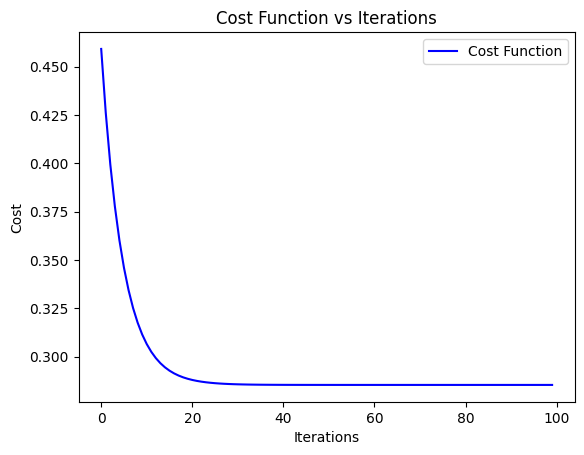

In [25]:
import matplotlib.pyplot as plt

# Plot the cost function vs iterations
plt.plot(range(iterations), cost_history, color="blue", label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs Iterations")
plt.legend()
plt.show()

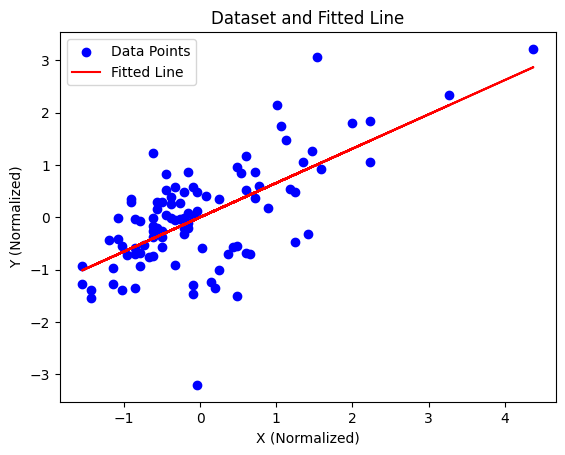

In [26]:
# Plot the dataset and the fitted line
plt.scatter(linearX_np, linearY_np, color="blue", label="Data Points")
plt.plot(linearX_np, theta_0 + theta_1 * linearX_np, color="red", label="Fitted Line")
plt.xlabel("X (Normalized)")
plt.ylabel("Y (Normalized)")
plt.title("Dataset and Fitted Line")
plt.legend()
plt.show()

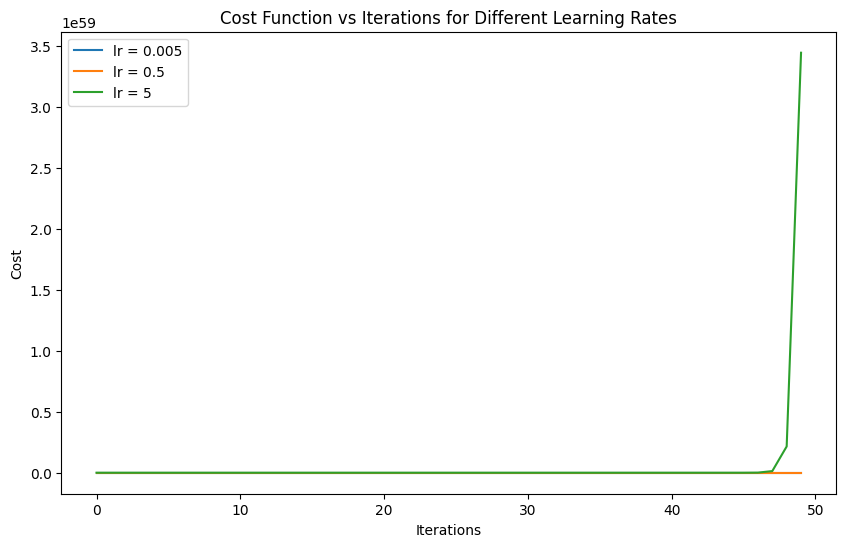

In [27]:
# Function to perform gradient descent for a given learning rate
def gradient_descent(X, Y, lr, iterations=50):
    theta_0, theta_1 = 0, 0
    m = len(X)
    cost_history = []

    for i in range(iterations):
        predictions = theta_0 + theta_1 * X
        error = predictions - Y
        
        # Compute gradients
        gradient_theta_0 = (1 / m) * np.sum(error)
        gradient_theta_1 = (1 / m) * np.sum(error * X)
        
        # Update parameters
        theta_0 -= lr * gradient_theta_0
        theta_1 -= lr * gradient_theta_1
        
        # Compute and store the cost
        cost = compute_cost(theta_0, theta_1, X, Y)
        cost_history.append(cost)

    return cost_history

# Test for different learning rates
learning_rates = [0.005, 0.5, 5]
iterations = 50

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    cost_history = gradient_descent(linearX_np, linearY_np, lr, iterations)
    plt.plot(range(iterations), cost_history, label=f"lr = {lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.legend()
plt.show()

In [28]:
def stochastic_gradient_descent(X, Y, lr, iterations=50):
    theta_0, theta_1 = 0, 0
    m = len(X)
    cost_history = []

    for i in range(iterations):
        for j in range(m):  # Loop through each sample
            x_sample = X[j]
            y_sample = Y[j]

            # Compute prediction and error for one sample
            prediction = theta_0 + theta_1 * x_sample
            error = prediction - y_sample

            # Update parameters
            theta_0 -= lr * error
            theta_1 -= lr * error * x_sample

        # Compute cost for the entire dataset after each iteration
        cost = compute_cost(theta_0, theta_1, X, Y)
        cost_history.append(cost)

    return cost_history

In [29]:
def mini_batch_gradient_descent(X, Y, lr, batch_size=10, iterations=50):
    theta_0, theta_1 = 0, 0
    m = len(X)
    cost_history = []

    for i in range(iterations):
        # Shuffle data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        # Process mini-batches
        for start in range(0, m, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            Y_batch = Y_shuffled[start:end]

            # Compute predictions and error for the batch
            predictions = theta_0 + theta_1 * X_batch
            error = predictions - Y_batch

            # Update parameters using batch
            gradient_theta_0 = (1 / len(X_batch)) * np.sum(error)
            gradient_theta_1 = (1 / len(X_batch)) * np.sum(error * X_batch)
            theta_0 -= lr * gradient_theta_0
            theta_1 -= lr * gradient_theta_1

        # Compute cost for the entire dataset after each iteration
        cost = compute_cost(theta_0, theta_1, X, Y)
        cost_history.append(cost)

    return cost_history

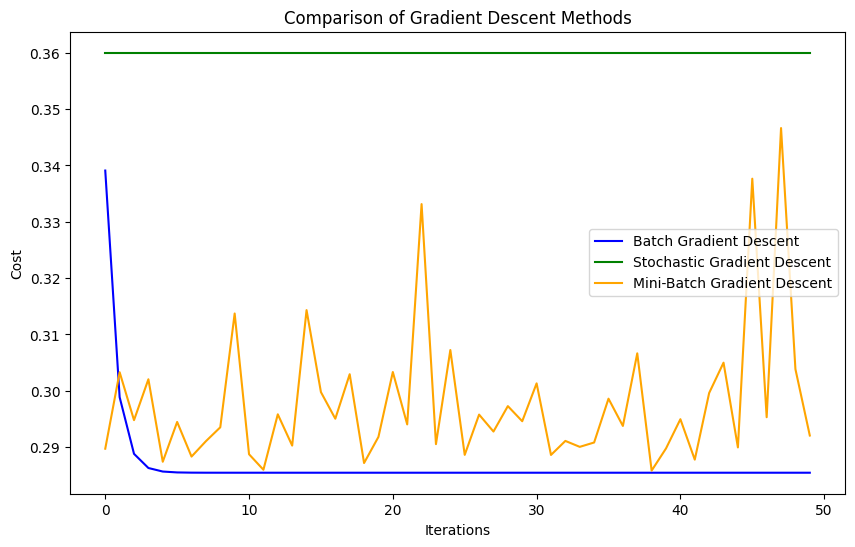

In [30]:
# Parameters
learning_rate = 0.5  # Use the most suitable learning rate
iterations = 50
batch_size = 10

# Perform the three methods
cost_batch = gradient_descent(linearX_np, linearY_np, learning_rate, iterations)
cost_sgd = stochastic_gradient_descent(linearX_np, linearY_np, learning_rate, iterations)
cost_mini_batch = mini_batch_gradient_descent(linearX_np, linearY_np, learning_rate, batch_size, iterations)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_batch, label="Batch Gradient Descent", color="blue")
plt.plot(range(iterations), cost_sgd, label="Stochastic Gradient Descent", color="green")
plt.plot(range(iterations), cost_mini_batch, label="Mini-Batch Gradient Descent", color="orange")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Comparison of Gradient Descent Methods")
plt.legend()
plt.show()